In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from api_import import *

In [2]:
#data = np.genfromtxt("2013_gaz_tracts_36.txt",delimiter=",",)
data = pd.read_csv("../data/gazetter_tracts/2013_gaz_tracts_36.txt",header=0,dtype={'GEOID': np.int64, 
        'ALAND': float, 'AWATER': float, 'ALAND_SQMI': float, 'AWATER_SQMI': float, 
        'INTPTLAT': float, 'INTPTLONG': float})

In [3]:
data.head(5)

,USPS,GEOID,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,NY,36001000100,2367456,245021,0.914,0.095,42.663754,-73.736909
1,NY,36001000200,2065161,0,0.797,0.000,42.664413,-73.751504
2,NY,36001000300,5779329,55326,2.231,0.021,42.680614,-73.783004
3,NY,36001000401,9017989,134152,3.482,0.052,42.702508,-73.866753
4,NY,36001000403,3138700,0,1.212,0.000,42.676874,-73.805264


In [4]:
#add state, county, county, tract id, block id information to data frame
data['STATE'] = ''
data['STATE_ID'] = ''
data['GEOID'] = data['GEOID'].astype("str")
data['BOROUGH'] = ''
data['COUNTY_ID'] = ''
data['TRACT_ID'] = ''
data['LATMIN'] = 0.0
data['LATMAX'] = 0.0
data['LONGMIN'] = 0.0
data['LONGMAX'] = 0.0
data['ZIPCODE'] = ''
data['FRAC_LAND'] = data['ALAND'] / (data['ALAND'] + data['AWATER'])

## ---IGNORING ZIP CODES SINCE THEY ARE MAIL ROUTES AND NOT ALWAYS MAPPED CORRECTLY TO TRACT + COUNTY CODE COMBINATIONS

In [20]:
#zip_tract_dict = zip_to_tract()
#tract_zip_dict = tract_to_zip()
#ziplist = zip_tract_dict.keys() #if y[0] == '61']
data.head(5)

,USPS,GEOID,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG,STATE,STATE_ID,BOROUGH,COUNTY_ID,TRACT_ID,LATMIN,LATMAX,LONGMIN,LONGMAX,ZIPCODE,FRAC_LAND
0,NY,36001000100,2367456,245021,0.914,0.095,42.663754,-73.736909,,36,,001,000100,42.656477,42.671032,-73.746472,-73.727347,,0.906211
1,NY,36001000200,2065161,0,0.797,0.000,42.664413,-73.751504,,36,,001,000200,42.657942,42.670883,-73.760006,-73.743002,,1.000000
2,NY,36001000300,5779329,55326,2.231,0.021,42.680614,-73.783004,,36,,001,000300,42.669738,42.691490,-73.797294,-73.768713,,0.990518
3,NY,36001000401,9017989,134152,3.482,0.052,42.702508,-73.866753,,36,,001,000401,42.688886,42.716129,-73.884651,-73.848855,,0.985342
4,NY,36001000403,3138700,0,1.212,0.000,42.676874,-73.805264,,36,,001,000403,42.668898,42.684851,-73.815746,-73.794783,,1.000000


In [6]:
#function to parse GEOID
def parse_geoid(geoidstr):
    return geoidstr[:2],geoidstr[2:5],geoidstr[5:]

In [7]:
#http://msi.nga.mil/MSISiteContent/StaticFiles/Calculators/degree.html to get meters->lat, long
#latitude (NYC) = 40.7 degrees
#1 degree of latitude = 111048 meters
#1 degree of longitude = 84515 meters 
for irow, row in data.iterrows():
    state, county, tract =  parse_geoid(row['GEOID'])
    data.ix[irow,'STATE_ID'] = state
    data.ix[irow,'COUNTY_ID'] = county
    data.ix[irow,'TRACT_ID'] = tract
    #data.ix[irow,'BLOCK_ID'] = block
    length = np.sqrt(row['ALAND'] + row['AWATER'])  #in meters
    dlat = 0.5 * length * (1./111048.)
    dlon = 0.5 * length * (1./84515.)
    data.ix[irow,'LATMIN'], data.ix[irow,'LATMAX'] = row['INTPTLAT'] - dlat, row['INTPTLAT'] + dlat
    data.ix[irow,'LONGMIN'], data.ix[irow,'LONGMAX'] = row['INTPTLONG'] - dlon, row['INTPTLONG'] + dlon

In [8]:
data.loc[data.COUNTY_ID == "061","BOROUGH"] = "Manhattan"
data.loc[data.COUNTY_ID == "047","BOROUGH"] = "Brooklyn"
data.loc[data.COUNTY_ID == "081","BOROUGH"] = "Queens"
data.loc[data.COUNTY_ID == "085","BOROUGH"] = "Staten"
data.loc[data.COUNTY_ID == "005","BOROUGH"] = "Bronx"
data.BOROUGH.unique()

array(['', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten'], dtype=object)

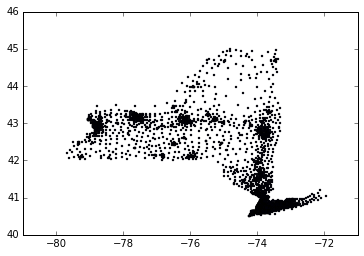

In [9]:
#plot of new york from census tracts
plt.scatter(data['INTPTLONG'],data['INTPTLAT'],s=2)

In [19]:
#Create subsets for nyc 5 boroughs and for manhattan only
nyc = data[(data['COUNTY_ID'] == "061") | (data['COUNTY_ID'] == "047") | 
           (data['COUNTY_ID'] == "005") | (data['COUNTY_ID'] == "081") | 
           (data['COUNTY_ID'] == "085")]

manhattan = nyc[(nyc['COUNTY_ID'] == "061")]

In [95]:
tract_zip_dict

{('029', '008102'): '14223',
 ('069', '050301'): '14548',
 ('047', '119000'): '11208',
 ('047', '121000'): '11208',
 ('029', '009107'): '14228',
 ('105', '951300'): '12790',
 ('027', '210301'): '12508',
 ('021', '000900'): '12529',
 ('047', '053500'): '11211',
 ('085', '027704'): '10314',
 ('003', '950100'): '14884',
 ('061', '001800'): '10002',
 ('039', '080402'): '12492',
 ('103', '123201'): '11735',
 ('081', '077906'): '11367',
 ('055', '012305'): '14534',
 ('085', '017010'): '10312',
 ('085', '017008'): '10312',
 ('111', '954500'): '12566',
 ('079', '011700'): '10512',
 ('103', '111601'): '11768',
 ('005', '036300'): '10460',
 ('077', '591400'): '13861',
 ('051', '030500'): '14454',
 ('093', '021700'): '12304',
 ('067', '011600'): '13027',
 ('059', '406501'): '11552',
 ('061', '021600'): '10026',
 ('067', '016502'): '13108',
 ('043', '010100'): '13491',
 ('059', '411500'): '11598',
 ('037', '950700'): '14020',
 ('103', '158608'): '11779',
 ('103', '147602'): '11769',
 ('029', '0142

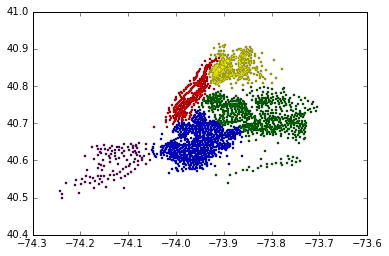

In [68]:
#Plot of NYC color-coded by borough! 
plt.scatter(nyc['INTPTLONG'],nyc['INTPTLAT'],s=2)
plt.scatter(nyc[nyc['COUNTY_ID'] == "061"]['INTPTLONG'],nyc[nyc['COUNTY_ID'] == "061"]['INTPTLAT'],s=2,color='red',alpha=0.5)
plt.scatter(nyc[nyc['COUNTY_ID'] == "047"]['INTPTLONG'],nyc[nyc['COUNTY_ID'] == "047"]['INTPTLAT'],s=2,color='blue',alpha=0.5)
plt.scatter(nyc[nyc['COUNTY_ID'] == "081"]['INTPTLONG'],nyc[nyc['COUNTY_ID'] == "081"]['INTPTLAT'],s=2,color='green',alpha=0.5)
plt.scatter(nyc[nyc['COUNTY_ID'] == "085"]['INTPTLONG'],nyc[nyc['COUNTY_ID'] == "085"]['INTPTLAT'],s=2,color='purple',alpha=0.5)
plt.scatter(nyc[nyc['COUNTY_ID'] == "005"]['INTPTLONG'],nyc[nyc['COUNTY_ID'] == "005"]['INTPTLAT'],s=2,color='yellow',alpha=0.5)

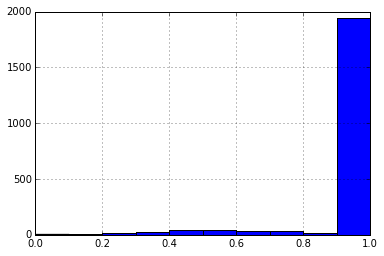

In [69]:
#Fraction of NYC census tracts that are 100% over land = 90%
nyc['FRAC_LAND'].hist(bins=10)

In [70]:
print "fraction of tract census areas 90% land = ",float(len(nyc[nyc['FRAC_LAND'] > 0.90]))/len(nyc['FRAC_LAND'])

fraction of tract census areas 90% land =  0.897092754961


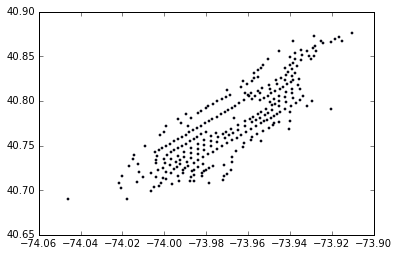

In [71]:
plt.scatter(manhattan['INTPTLONG'],manhattan['INTPTLAT'],s=3)

In [72]:
print manhattan[['LONGMIN','LONGMAX','LATMIN','LATMAX']]

        LONGMIN    LONGMAX     LATMIN     LATMAX
2388 -74.047801 -74.044483  40.688793  40.691318
2389 -73.988100 -73.983068  40.707984  40.711814
2390 -73.984083 -73.973607  40.704434  40.712407
2391 -74.029897 -74.005885  40.681169  40.699444
2392 -73.991504 -73.983740  40.706758  40.712667
2393 -74.009088 -74.001157  40.700858  40.706894
2394 -73.996925 -73.989460  40.707286  40.712967
2395 -74.011310 -74.001003  40.694754  40.702598
2396 -73.975429 -73.968738  40.708750  40.713842
2397 -73.975409 -73.967451  40.712390  40.718446
2398 -73.984148 -73.980040  40.714343  40.717470
2399 -74.016289 -74.009672  40.706591  40.711627
2400 -73.989141 -73.985522  40.713783  40.716537
2401 -73.987885 -73.983886  40.715994  40.719037
2402 -74.005344 -73.997586  40.704592  40.710496
2403 -74.006255 -73.998942  40.702168  40.707734
2404 -73.995982 -73.990582  40.713893  40.718003
2405 -73.993637 -73.988054  40.716923  40.721172
2406 -73.973257 -73.967185  40.716046  40.720668
2407 -74.012949 -74.

In [73]:
import yelp_api_bounds 

In [26]:
type_cuisine = "mexican"
yelp_dict = {}
for irow, row in manhattan.head(8).iterrows():
    lat_min = row['LATMIN']
    lat_max = row['LATMAX']
    long_min = row['LONGMIN']
    long_max = row['LONGMAX']
    bounds_str = "{0:<11.6f},{1:<11.6f}|{2:<11.6f},{3:<11.6f}".format(lat_min,long_max,lat_max,long_min) 
    bounds_str = bounds_str.replace(" ","")
    yelp_dict[row.GEOID] = yelp_api_bounds.query_api(type_cuisine, bounds_str)

Querying http://api.yelp.com/v2/search/? ...
No businesses for mexican in 40.688793,-74.044483|40.691318,-74.047801 found.
Querying http://api.yelp.com/v2/search/? ...
No businesses for mexican in 40.707984,-73.983068|40.711814,-73.988100 found.
Querying http://api.yelp.com/v2/search/? ...
No businesses for mexican in 40.704434,-73.973607|40.712407,-73.984083 found.
Querying http://api.yelp.com/v2/search/? ...
No businesses for mexican in 40.681169,-74.005885|40.699444,-74.029897 found.
Querying http://api.yelp.com/v2/search/? ...
No businesses for mexican in 40.706758,-73.983740|40.712667,-73.991504 found.
Querying http://api.yelp.com/v2/search/? ...
oaxaca-wahaka-express-new-york
Oaxaca Wahaka Express
4.0
10038
san-luis-tacos-truck-new-york
San Luis Tacos Truck
3.0
10005
veronicas-kitchen-new-york
Veronica's Kitchen
4.0
10005
el-luchador-new-york-2
El Luchador
4.0
10038
souvlaki-gr-new-york-2
Souvlaki GR
3.5
11215
chopt-new-york-5
Chop't
3.0
10005
mike-and-jens-camion-modern-mexican-

In [28]:
ix = yelp_dict.keys()

In [52]:
len(yelp_dict[ix[7]])
for element in yelp_dict[ix[7]]:
    print element["name"],element["id"]

Oaxaca Wahaka Express oaxaca-wahaka-express-new-york
San Luis Tacos Truck san-luis-tacos-truck-new-york
Veronica's Kitchen veronicas-kitchen-new-york
El Luchador el-luchador-new-york-2
Souvlaki GR souvlaki-gr-new-york-2
Chop't chopt-new-york-5
Mike & Jen's CAMION - Modern Mexican mike-and-jens-camion-modern-mexican-new-york
Shin Ju Sushi shin-ju-sushi-new-york
Flavors Cafe flavors-cafe-new-york
Dig Inn Seasonal Market dig-inn-seasonal-market-new-york-5
Hale & Hearty Soups hale-and-hearty-soups-new-york-21
Cafe Bravo cafe-bravo-new-york-4
SmorgasBar smorgasbar-new-york
Chipotle Mexican Grill chipotle-mexican-grill-new-york-32
Il Porto il-porto-new-york
Watermark Bar watermark-bar-new-york
Ise Japanese Restaurant ise-japanese-restaurant-new-york-2


##Looking for Restaurant Information from http://www.yelp.com/biz/
<p><strong>Within query_api, save the unique restaurant-id and then append that to yelp.com/biz/ !!!</strong> </p>

In [47]:
print data.loc[data["GEOID"] == 36061000700,:]

     USPS        GEOID   ALAND  AWATER  ALAND_SQMI  AWATER_SQMI   INTPTLAT  \
2393   NY  36061000700  253844  195407       0.098        0.075  40.703876   

      INTPTLONG STATE STATE_ID    BOROUGH COUNTY_ID TRACT_ID BLOCK_ID  \
2393 -74.005122             36  Manhattan       061    00070        0   

        LATMIN    LATMAX   LONGMIN   LONGMAX  FRAC_LAND  
2393  40.70086  40.70689 -74.00909 -74.00116   0.565038  
